<a href="https://colab.research.google.com/github/farhanasajeer/correlation-regression/blob/main/wineN_CORR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/winequalityN.csv')

In [ ]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
data['fixed acidity']=data['fixed acidity'].fillna(data['fixed acidity'].median())
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [ ]:
for i in ['volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'pH', 'sulphates']:
       data[i]=data[i].fillna(data[i].median())
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data=pd.get_dummies(data)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


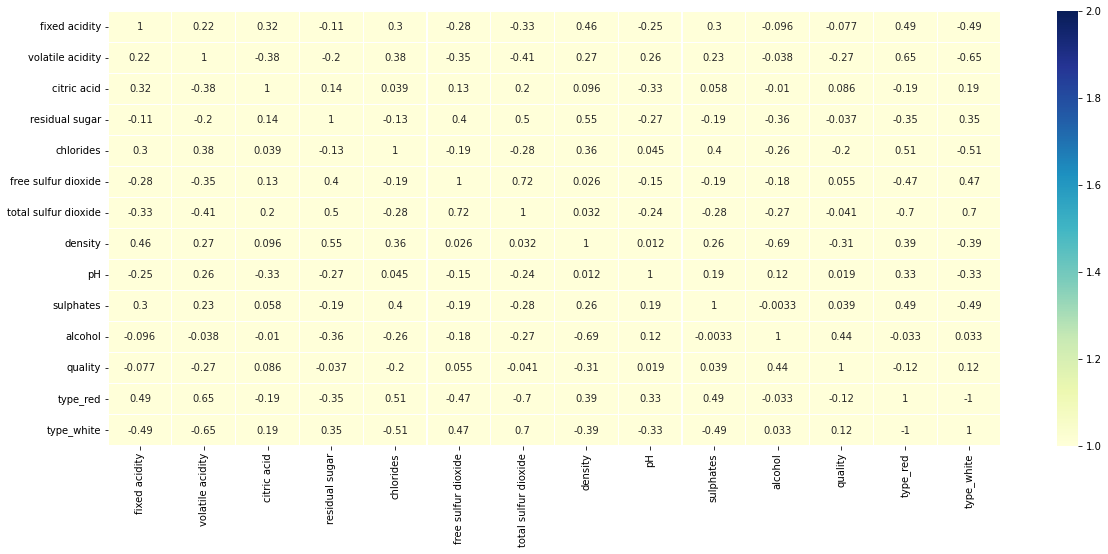

In [ ]:

corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=2, vmax=1, annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
x=data.drop('quality',axis=1)
y=data['quality']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
# make linear regression model
from sklearn import linear_model
# create instance of the model
lr=linear_model.LinearRegression()
# now fitting the instance created to the training data and creating the linear regression model and store into another variable
model=lr.fit(x_train,y_train)

In [ ]:
# predict the output
predictions=model.predict(x_test)

In [ ]:
print(y_test)

3103    7
1419    7
4761    6
4690    6
4032    5
       ..
4509    5
3350    6
1730    6
2225    4
5230    6
Name: quality, Length: 1625, dtype: int64


In [ ]:
print(predictions)

[6.34556119 6.00450961 5.77420713 ... 5.74834947 5.63929243 5.09823658]


In [ ]:
from sklearn.metrics import  mean_squared_error
print('MSC is:', mean_squared_error(y_test,predictions))

MSC is: 0.4849526492551222
